In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skimpy import skim
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.style as style

In [16]:
df = pd.read_csv('IMDb_Movies_India.csv', encoding='latin1')

In [17]:
df.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [18]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15509  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 10     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA      ┃ NA %     ┃ mean    ┃ sd    ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Rating           │    7590 │    48.94 │     5.8 │   1.4 │   1.1 │   4.9 │     6 │   6.8 │     10 │   ▂▅▇▃  │  │
│ └──────────────────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %         ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Name                     │          0 │            0 │                        2.3 │                  35408 │  │
│ │ Year                     │        528 │          3.4 │                       0.97 │                  14981 │  │
│ │ Duration                 │       8269 │        53.32 │                       0.93 │                  14480 │  │
│ │ Genre                    │       1877 │         12.1 │                        1.5 │                  23073 │  │
│ │ Votes                    │       7589 │        48.93 │                       0.51 │                   7920 │  │
│ │ Director                 │        525 │         3.39 │                          2 │                  30379 │  │
│ │ Actor 1                  │       1617 │        10.43 │                        1.7 │                  25763 │  │
│ │ Actor 2                  │       2384 │        15.37 │                        1.6 │                  24058 │  │
│ │ Actor 3                  │       3144 │        20.27 │                        1.5 │                  22648 │  │
│ └──────────────────────────┴────────────┴──────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [19]:
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

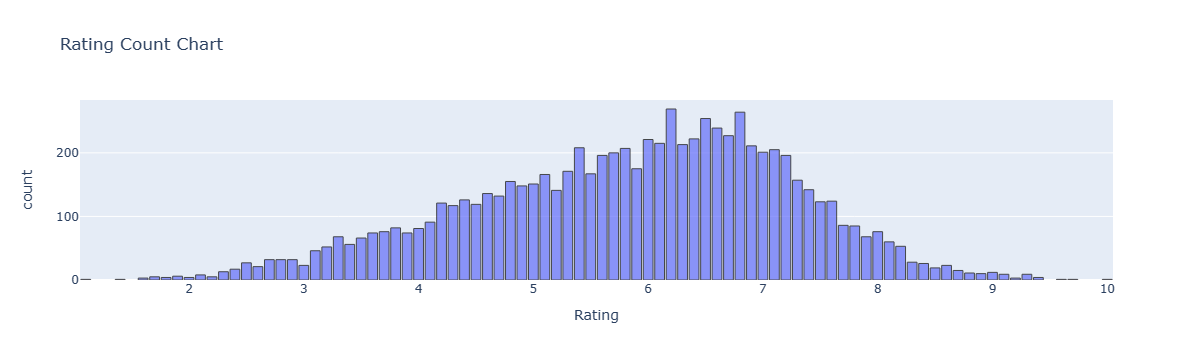

In [20]:
fig = px.histogram(df, x='Rating', title='Rating Count Chart')

fig.update_xaxes(title_text='Rating') 
fig.update_xaxes(showticklabels=True)
fig.update_traces(marker=dict(line=dict(color='black', width=1), opacity=0.7))
fig.update_layout(bargap=0.15) 
fig.show()

In [21]:
df.dropna(subset=["Year", "Duration", "Genre", "Director", "Actor 1", "Actor 2", "Actor 3","Votes"], inplace=True)

In [22]:
df["Duration"] = df["Duration"].str.extract('(\d+)').astype(int)
df["Year"] = df["Year"].str.extract('(\d+)').astype(int)
df['Votes'] = df['Votes'].str.extract('(\d+)').astype(int)

In [23]:
label_encoders = {}
for column in ["Name","Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [24]:
X = df.drop("Rating", axis=1)
y = df["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1.7584688190353708
Mean Absolute Error: 1.0740746416337792


In [27]:
style.use('ggplot')
num_features = 9

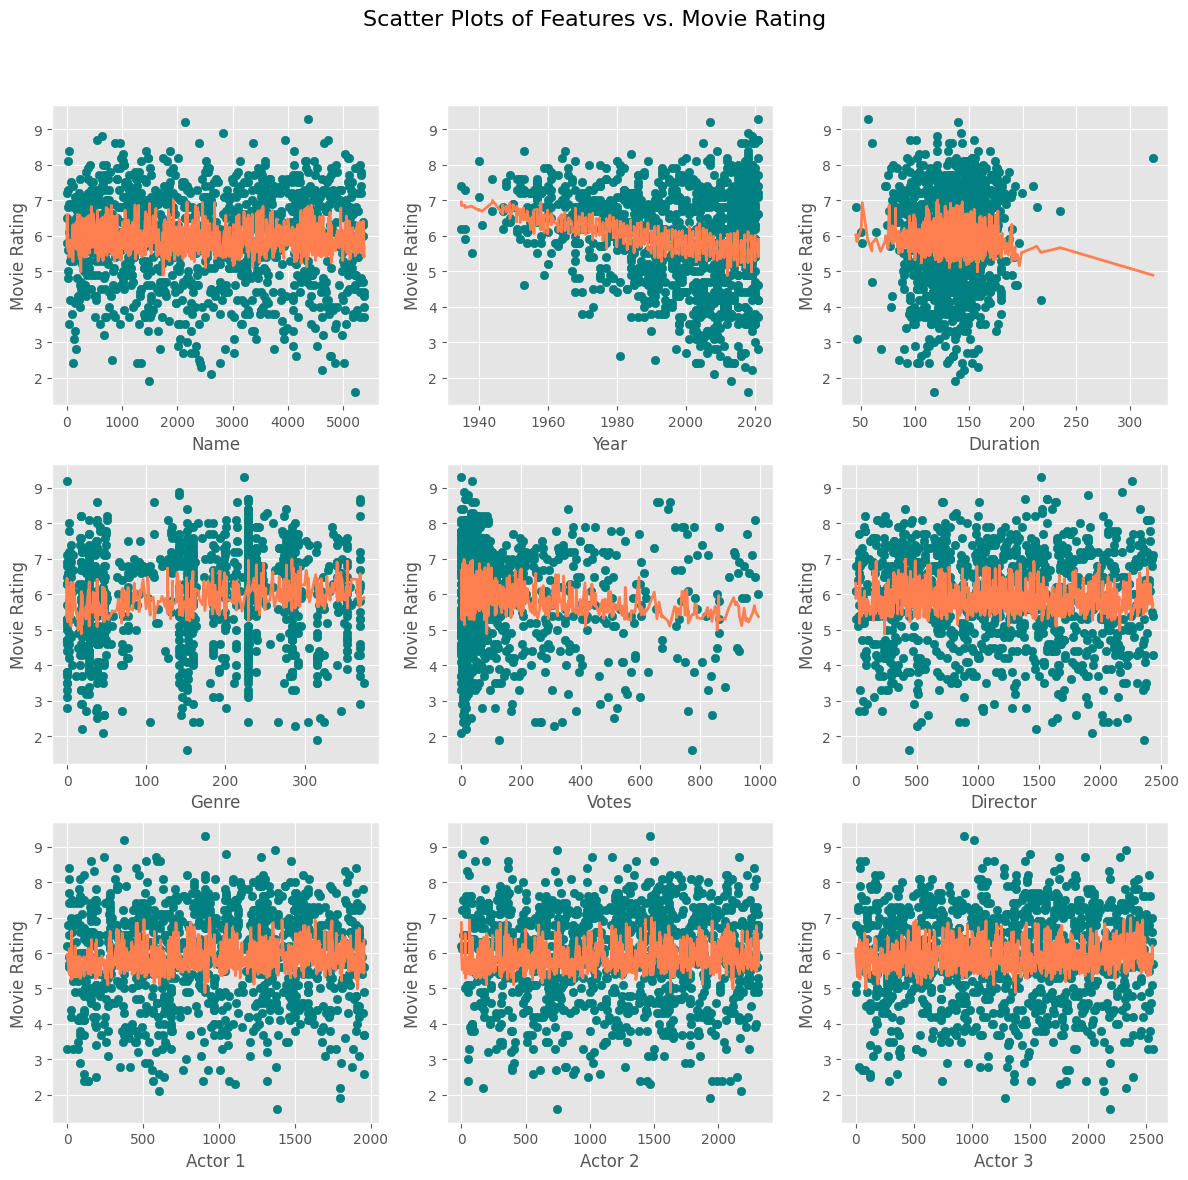

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle("Scatter Plots of Features vs. Movie Rating", fontsize=16)

for i in range(num_features):
    row, col = i // 3, i % 3
    x_feature = X_test.iloc[:, i]
    axes[row, col].scatter(x_feature, y_test, color='teal', label='Actual Data')
    sorted_indices = x_feature.argsort()
    x_feature_sorted = x_feature.iloc[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]
    axes[row, col].plot(x_feature_sorted, y_pred_sorted, color='coral', linewidth=2, label='Regression Line')
    axes[row, col].set_xlabel(X_test.columns[i])
    axes[row, col].set_ylabel('Movie Rating')
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()